In [7]:
from collections import defaultdict
# import copy
# import random
import os
import shutil
# from urllib.request import urlretrieve

# import albumentations as A
# import albumentations.augmentations.functional as F
# from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
import numpy as np
# import ternausnet.models
# from tqdm import tqdm
# import torch
# import torch.backends.cudnn as cudnn
# import torch.nn as nn
# import torch.optim
# from torch.utils.data import Dataset, DataLoader

%matplotlib inline

# cudnn.benchmark = True

In [2]:
root_directory = os.path.join(os.getcwd()) # '/Users/Username/dataset'
images_directory = os.path.join(root_directory, "images")
masks_directory = os.path.join(root_directory, "annotations", "trimaps")

In [6]:
# Dir_name 
# [GREY]Grey Scale - rgb2gray
# [SILO]실루엣 - 고양이 흰색 그외 검정색
# [TXTR]텍스쳐 - 바운딩 박스 크롭하고 그 중 Half
# [BACK]배경 - 고양이 검정색 배경 그대로

aug_dir_names = ['grey', 'silo', 'txtr', 'back']
for name in aug_dir_names:
    dir_name = os.path.join(root_directory, f'images_{name}')
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)

In [10]:
images_filenames = list(sorted(os.listdir(images_directory)))
correct_images_filenames = [i for i in images_filenames if cv2.imread(os.path.join(images_directory, i)) is not None]
correct_images_filenames = [i for i in correct_images_filenames if os.path.splitext(i)[1] == '.jpg']

In [78]:
def preprocess_mask_silo(mask):
    mask = mask.astype(np.uint8)
    mask[(mask == 2.0) | (mask == 3.0)] = 0.0
    mask[mask == 1.0] = 255
    return mask

In [81]:
def to_silo(images_filenames, images_directory, target_directory):
    for i, image_filename in enumerate(images_filenames):
        extension = os.path.splitext(image_filename)[1] # find extension to exclue '.mat'
        if (extension == '.jpg'):
            image = cv2.imread(os.path.join(images_directory, image_filename))
            mask = cv2.imread(os.path.join(masks_directory, image_filename.replace(".jpg", ".png")), cv2.IMREAD_UNCHANGED,)
            silouetted = preprocess_mask_silo(mask)    
            cv2.imwrite(os.path.join(target_directory , image_filename), silouetted)     

In [ ]:
to_silo(correct_images_filenames, images_directory, os.path.join(root_directory, "images_silo"))

In [ ]:
# mask == 1.0: 고양이 부분
# mask == 2.0: 배경 부분
# mask == 3.0: 테두리 부분

In [132]:
def preprocess_mask_back(mask):
    mask = mask.astype(np.uint8)
    mask[mask == 2.0] = 255
    mask[(mask == 1.0) | (mask == 3.0)] = 0
    return mask

In [133]:
def to_back(images_filenames, images_directory, target_directory):
    for i, image_filename in enumerate(images_filenames):
        extension = os.path.splitext(image_filename)[1] # find extension to exclue '.mat'
        if (extension == '.jpg'):
            image = cv2.imread(os.path.join(images_directory, image_filename))
            mask = cv2.imread(os.path.join(masks_directory, image_filename.replace(".jpg", ".png")), cv2.IMREAD_UNCHANGED,)
            mask = preprocess_mask_back(mask)  
            background_only = cv2.bitwise_and(image, image, mask = mask)
            cv2.imwrite(os.path.join(target_directory , image_filename), background_only)

In [134]:
to_back(correct_images_filenames, images_directory, os.path.join(root_directory, "images_back"))

In [145]:
def to_grey(images_filenames, images_directory, target_directory):
    for i, image_filename in enumerate(images_filenames):
        extension = os.path.splitext(image_filename)[1] # find extension to exclue '.mat'
        if (extension == '.jpg'):
            image = cv2.imread(os.path.join(images_directory, image_filename))
            grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(os.path.join(target_directory , image_filename), grey_image)

In [146]:
to_grey(correct_images_filenames, images_directory, os.path.join(root_directory, "images_grey"))

In [ ]:
# mask == 1.0: 고양이 부분
# mask == 2.0: 배경 부분
# mask == 3.0: 테두리 부분

def preprocess_mask_txtr(mask):
    mask = mask.astype(np.uint8)
    mask[(mask == 2.0) | (mask == 3.0)] = 0.0
    mask[mask == 1.0] = 255
    # print(mask)

    rect = cv.minAreaRect(cnt)
    return mask

In [ ]:
to_txtr(correct_images_filenames, images_directory, os.path.join(root_directory, "images_txtr"))

In [157]:
def to_txtr(images_filenames, images_directory, target_directory):
    for i, image_filename in enumerate(images_filenames[101:102]):
        extension = os.path.splitext(image_filename)[1] # find extension to exclue '.mat'
        if (extension == '.jpg'):
            image = cv2.imread(os.path.join(images_directory, image_filename))
            mask = cv2.imread(os.path.join(masks_directory, image_filename.replace(".jpg", ".png")), cv2.IMREAD_UNCHANGED,)
            return mask
            # mask = preprocess_mask_back(mask)  
            # silouetted = cv2.imread(os.path.join(os.path.join(root_directory, "images_silo"), image_filename), cv2.IMREAD_UNCHANGED,)
            # print(silouetted)
            # return silouetted
            # texture_only_image = image
            # cv2.imwrite(os.path.join(target_directory , image_filename), texture_only_image)

In [181]:
mask = to_txtr(correct_images_filenames, images_directory, os.path.join(root_directory, "images_txtr"))
mask

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

278 55 3 3
279 54 3 3
280 53 3 3
281 50 4 5
168 50 127 312
0 0 400 383


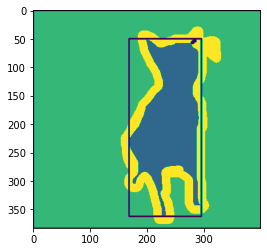

<Figure size 432x288 with 0 Axes>

In [183]:
ret, img_thresholded = cv2.threshold(mask, 1, 2, 0)
contours, hier = cv2.findContours(img_thresholded, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    # xy, wh, r = cv2.minAreaRect(c) # ((299.5, 199.5), (399.0, 599.0), 90.0)
    # rect = cv2.minAreaRect(c)
    # box = cv2.boxPoints(rect)
    # print(box)
    # x, y = xy
    # w, h = wh
    # print(x, y, w, h, r)

    x,y,w,h = cv2.boundingRect(c)
    print(x, y, w, h)
    cv2.rectangle(mask,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(mask)
plt.show()
plt.clf()

In [125]:
mask.shape

(400, 600)

In [126]:
len(mask[200])

600

In [127]:
mask[200]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

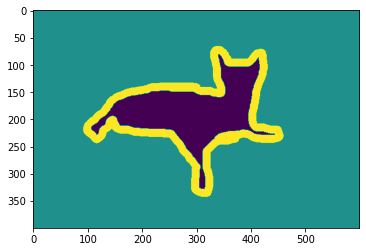

In [128]:
plt.imshow(mask)
plt.show()

In [129]:
ret, img_thresholded = cv2.threshold(mask, 1, 2, 0)

In [130]:
contours, hier = cv2.findContours(img_thresholded, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [131]:
for c in contours:
    print(c)
    area = cv2.contourArea(c)
    print(area)

[[[339  81]]

 [[340  80]]

 [[341  80]]

 [[346  85]]

 [[346  86]]

 [[347  87]]

 [[347  88]]

 [[349  90]]

 [[349  92]]

 [[350  93]]

 [[350  95]]

 [[351  96]]

 [[351  98]]

 [[354 101]]

 [[355 101]]

 [[356 102]]

 [[358 102]]

 [[359 103]]

 [[395 103]]

 [[396 102]]

 [[398 102]]

 [[400 100]]

 [[401 100]]

 [[409  92]]

 [[409  91]]

 [[411  89]]

 [[411  88]]

 [[413  86]]

 [[414  87]]

 [[414  91]]

 [[415  92]]

 [[415  98]]

 [[416  99]]

 [[416 108]]

 [[415 109]]

 [[415 111]]

 [[414 112]]

 [[414 118]]

 [[413 119]]

 [[413 120]]

 [[412 121]]

 [[412 123]]

 [[411 124]]

 [[411 125]]

 [[410 126]]

 [[410 127]]

 [[409 128]]

 [[409 130]]

 [[408 131]]

 [[408 132]]

 [[407 133]]

 [[407 134]]

 [[406 135]]

 [[406 137]]

 [[405 138]]

 [[405 142]]

 [[404 143]]

 [[404 144]]

 [[403 145]]

 [[403 147]]

 [[402 148]]

 [[402 157]]

 [[401 158]]

 [[401 163]]

 [[400 164]]

 [[400 169]]

 [[399 170]]

 [[399 172]]

 [[398 173]]

 [[398 179]]

 [[397 180]]

 [[397

299.5 199.5 399.0 599.0


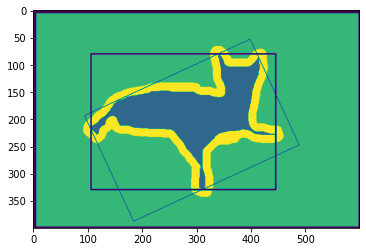

In [143]:
for c in contours:
    # x, y, w, h = cv2.boundingRect(c)
    # print(x, y, w, h)
    # foo = cv2.rectangle(mask, (x, y), (x+w,y+h), (0, 255, 0), 2)

    xy, wh, _ = cv2.minAreaRect(c) # ((299.5, 199.5), (399.0, 599.0), 90.0)
    x, y = xy
    w, h = wh
    print(x, y, w, h)
    
    # box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    # box = np.int0(box)
    # draw a red 'nghien' rectangle
    # cv2.drawContours(foo, [box], 0, (0, 0, 255))

    # print(foo)
    plt.imshow(foo)
    plt.show()


In [136]:
foo

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
ret,thresh1 = cv2.threshold(mask,127,255,cv2.THRESH_BINARY)
ret

127.0

In [23]:
thresh1[[165]]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
x, y, w, h = cv2.boundingRect(mask)

In [16]:
w

600

In [17]:
h

400

In [151]:
silouetted

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [153]:
rect = cv2.minAreaRect(silouetted)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv.drawContours(img,[box],0,(0,0,255),2)

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-oe0iat4a/opencv/modules/imgproc/src/convhull.cpp:143: error: (-215:Assertion failed) total >= 0 && (depth == CV_32F || depth == CV_32S) in function 'convexHull'


In [ ]:
silouetted[1]

In [155]:
contours, hierarchy = cv2.findContours(silouetted, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

In [161]:
len(contours)
len(hierarchy)

1